In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
pay_tables = pd.read_excel("PayTables.xlsx", header=0)
pay_table= pay_tables.drop(pay_tables.columns[:9], axis=1).drop(0).drop([10,11])
pay_table

,Pay Grade,BAH,<2,>2,>3,Total Pay With Over 4 Years In Service,Max Housing Cost,>6,>8,>10
1,E9,2211.0,0.0,0.0,0.0,8868.3,2483.124,0.0,0.00,8868.3
2,E8,2109.0,0.0,0.0,0.0,7558.5,2116.380,0.0,2116.38,7799.7
3,E7,2061.0,5849.1,6195.3,6354.0,6354.0,1837.668,6727.5,7008.60,7167.3
4,E6,2016.0,5292.6,5622.0,5781.0,5781.0,1662.024,6096.6,6459.90,6601.2
5,E5,1785.0,5005.5,5251.5,5422.5,5422.5,1564.416,5744.4,5927.40,6019.5
6,E4,1701.0,3027.3,4883.1,5055.9,5055.9,1463.196,5376.6,5376.60,5376.6
7,E3,1701.0,2733.0,4605.6,4782.0,4782.0,1338.960,4782.0,4782.00,4782.0
8,E2,1701.0,2599.2,2599.2,2599.2,2599.2,727.776,2599.2,2599.20,4300.2
9,E1,1701.0,2319.0,2319.0,2319.0,2319.0,649.320,2319.0,2319.00,2319.0


In [3]:
# fig, ax = plt.subplots(figsize=(16, 12))

# x = np.arange(len(pay_table["Pay Grade"]))  # label locations
# bar_width = 0.25

# bars1 = ax.bar(x - bar_width, pay_table["Total Pay With Over 4 Years In Service"].astype(int), bar_width, label="Total Pay With Over 4 Years In Service")
# bars2 = ax.bar(x, pay_table["BAH"].astype(int), bar_width, label="BAH")
# bars3 = ax.bar(x + bar_width, pay_table["Max Housing Cost"].astype(int), bar_width, label="Max Housing Cost")


# ax.set_ylabel("Monthly Payment")
# ax.set_xlabel("Rank")
# ax.set_title("Rank by Pay")

# ax.set_xticks(x)
# ax.set_xticklabels(pay_table["Pay Grade"])

# ax.legend()

# plt.tight_layout()
# plt.show()

In [4]:
Homes_df = pd.read_csv("Zillow Home Data.csv")
mortgage_payment = pd.read_csv("Mortgage Less Than 5% Down.csv")

In [5]:
Homes_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30
0,102001,0,United States,country,NaN,124019.600543,124237.790778,124508.378796,125088.736981,125756.659672,...,364887.940385,365134.936450,365592.248988,366189.554371,366689.942094,367420.664142,368059.703861,368525.889952,368246.712391,367711.290000
1,394913,1,"New York, NY",msa,NY,222146.522997,223090.520380,224043.260881,225973.881799,227973.106617,...,680423.425061,684264.897985,688397.686868,692014.780715,694858.397482,696689.634779,697789.596039,699105.500259,700833.601491,703312.444452
2,753899,2,"Los Angeles, CA",msa,CA,228718.240420,229569.362470,230703.048922,232958.704131,235425.683777,...,968418.651974,973792.939174,980450.611921,985862.809217,990525.982435,994694.146730,995249.411393,993154.565018,987893.790581,983437.586416
3,394463,3,"Chicago, IL",msa,IL,156805.943394,156951.100018,157227.553366,157915.300593,158742.577784,...,329363.658595,330307.145398,331333.903559,332334.479416,333397.230445,334673.721470,336048.385866,337424.590186,338289.072156,338903.206624
4,394514,4,"Dallas, TX",msa,TX,130576.437280,130634.596482,130701.456437,130875.084719,131104.008855,...,386500.439246,385825.997560,385621.184673,385511.571046,385213.099158,384670.679369,384129.494125,383323.904663,381786.689047,379610.557484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,135095.971026,134735.871029,134077.451702,133159.679427,132360.990367,131784.249540,131322.591694,130823.048414,130104.593744,128051.021149
891,394743,936,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,377864.146265,377814.956984,379103.498533,380958.793264,381457.184839,381833.783592,382307.668315,383532.743543,384337.580829,386060.536555
892,753874,937,"Craig, CO",msa,CO,98904.744505,99157.650853,99628.496223,100299.023520,101078.222140,...,287551.785556,287780.451200,289142.803089,290842.391175,292067.277987,293129.566737,293411.886710,294184.226639,294502.091185,295778.370744
893,395188,938,"Vernon, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,112389.196942,111805.034025,110275.013924,108346.538294,106023.267503,104475.571595,103345.980197,102316.376901,101099.428644,99582.568447


In [6]:
Fay_mortgage = mortgage_payment[(mortgage_payment["StateName"]== "NC") & (mortgage_payment["RegionName"] == "Fayetteville, NC")]

# fayetteville_row = Homes_df[(Homes_df["StateName"] == "NC") & (Homes_df["RegionName"] == "Fayetteville, NC")]

In [7]:
Fay_mortgage_clean = Fay_mortgage.loc[:,"2019-12-31":]
Fay_mortgage_clean.columns= pd.to_datetime(Fay_mortgage_clean.columns).to_pydatetime()

# fig, ax = plt.subplots()
# ax.plot(Fay_mortgage_clean.columns.T, Fay_mortgage_clean.values.reshape(-1,1))

# sns.regplot(x=Fay_mortgage_clean.T.index, y=Fay_mortgage_clean.T)
# type(Fay_mortgage_clean.columns[0])
# Fay_mortgage_clean.to_csv("Fayetteville_Mortgage_Payments")


In [8]:
NC_House_Price_DF = Homes_df[Homes_df["StateName"] == "NC"]
NC_House_Price_DF.dropna()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30
23,394458,23,"Charlotte, NC",msa,NC,145538.891704,145739.373697,146003.984940,146521.930650,147118.779166,...,391285.660296,390809.213204,390623.305846,390632.883129,390744.836449,390979.481799,391343.838741,391523.064854,391207.366879,390425.295629
42,395012,43,"Raleigh, NC",msa,NC,176132.050578,176199.953260,176506.933990,177085.693100,177932.392359,...,455999.799652,455587.042542,455418.449539,455268.191475,455072.339158,454912.711509,454639.004293,454023.777853,452781.298669,451518.526573
74,394648,76,"Greensboro, NC",msa,NC,108659.612475,108849.356445,109002.385828,109367.009203,109731.334293,...,254669.321097,254618.889703,254317.112046,254113.799941,253983.889151,254625.729653,255445.613453,256121.565523,255946.031461,255235.143407
86,395235,89,"Winston, NC",msa,NC,115832.698540,116217.854629,116435.058642,116992.887161,117466.505606,...,269612.564709,269929.405322,269593.825277,269164.212429,268879.325123,269586.869844,270276.350085,270717.098026,270128.734276,269347.886481
106,394589,109,"Fayetteville, NC",msa,NC,110032.240834,110125.173759,110134.341123,110255.541057,110448.087436,...,248107.804297,248464.506610,248563.579306,248455.732373,248307.348579,248696.647110,249281.637733,249836.910300,249809.174126,249468.510442
118,394338,121,"Asheville, NC",msa,NC,118004.795623,118456.522931,118691.420742,119276.698000,119761.335650,...,436604.059267,437164.242681,438198.471250,439558.926824,440391.711557,441200.524742,441625.417066,441753.724509,440771.423944,439148.666017
147,394679,150,"Hickory, NC",msa,NC,92930.116519,93032.473007,93134.358576,93403.307472,93803.851999,...,259848.786067,260097.526225,259875.915178,259686.340552,259494.291052,260133.640044,260678.410934,261215.836004,260968.582422,260468.822798
294,395036,303,"Rocky Mount, NC",msa,NC,83449.514799,83723.767539,84059.847921,84447.971577,84868.765116,...,200117.805617,199895.914614,198770.108156,197431.779088,196201.198790,196383.183657,196828.253777,197433.019322,197045.649901,196019.712388
331,394905,341,"New Bern, NC",msa,NC,99525.981927,99698.649440,99854.316934,100149.809205,100546.720271,...,251747.296554,251948.125002,252153.942367,252637.053854,253050.334459,253758.163801,254431.541353,254856.631188,254703.116730,254458.596184
340,394635,350,"Goldsboro, NC",msa,NC,87935.755754,87926.113837,87927.967596,87992.903930,88163.821042,...,190128.275161,189277.948050,186969.045714,184734.810569,182949.235641,182627.440954,182572.567275,183324.999471,183502.225397,182704.515974


In [9]:
National_avg_Home = Homes_df.loc[:, "2000-01-31":].mean()
National_avg_Home

2000-01-31    110644.563729
2000-02-29    110829.212101
2000-03-31    110987.444475
2000-04-30    111697.110347
2000-05-31    112452.937688
                  ...      
2024-12-31    291991.869450
2025-01-31    292783.339336
2025-02-28    293471.866073
2025-03-31    293471.515502
2025-04-30    293140.573601
Length: 304, dtype: float64

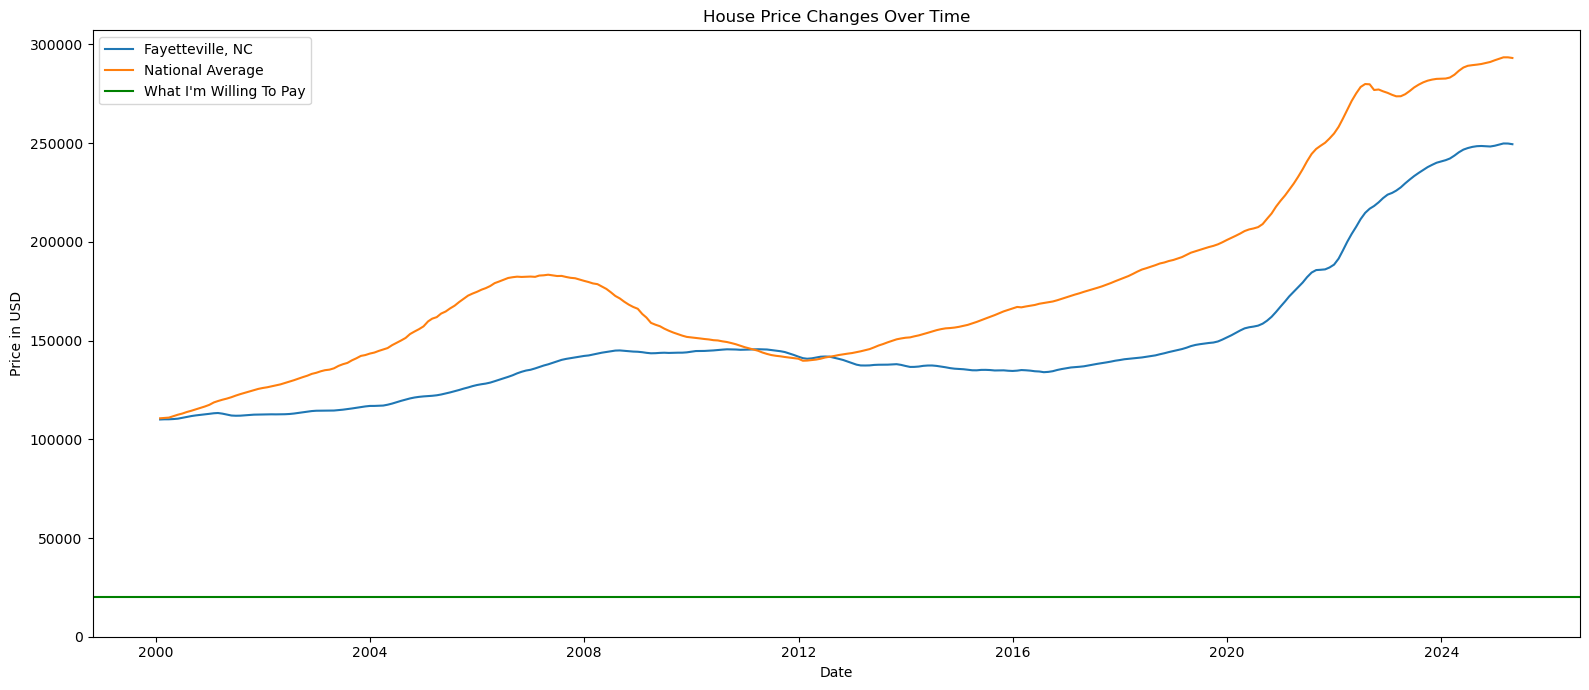

In [10]:

# Filter for Fayetteville
fayetteville_row = Homes_df[(Homes_df["StateName"] == "NC") & (Homes_df["RegionName"] == "Fayetteville, NC")]

# Extract price time series
fayetteville_prices = fayetteville_row.drop(columns=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName"]).T
fayetteville_prices.columns = ["Price"]
fayetteville_prices.index = pd.to_datetime(fayetteville_prices.index)
National_avg_Home.index=pd.to_datetime(National_avg_Home.index)

# Plot
fig, ax = plt.subplots(figsize=(16, 7))
ax.plot(fayetteville_prices.index, fayetteville_prices["Price"], label="Fayetteville, NC")
ax.plot(National_avg_Home.index, National_avg_Home, label= "National Average")
Willing= ax.axhline(20000, color="green", label="What I'm Willing To Pay")

ax.set_title("House Price Changes Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Price in USD")
ax.legend()
plt.tight_layout()
ax.set_ylim(bottom=0)
plt.show()

In [11]:
AVG_Mortgage_12mo_trail= Fay_mortgage_clean.loc[:,"2024-04-30":].mean().mean()

AVG_Mortgage_12mo_trail

2086.190650354179

In [12]:
Homes_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30
0,102001,0,United States,country,NaN,124019.600543,124237.790778,124508.378796,125088.736981,125756.659672,...,364887.940385,365134.936450,365592.248988,366189.554371,366689.942094,367420.664142,368059.703861,368525.889952,368246.712391,367711.290000
1,394913,1,"New York, NY",msa,NY,222146.522997,223090.520380,224043.260881,225973.881799,227973.106617,...,680423.425061,684264.897985,688397.686868,692014.780715,694858.397482,696689.634779,697789.596039,699105.500259,700833.601491,703312.444452
2,753899,2,"Los Angeles, CA",msa,CA,228718.240420,229569.362470,230703.048922,232958.704131,235425.683777,...,968418.651974,973792.939174,980450.611921,985862.809217,990525.982435,994694.146730,995249.411393,993154.565018,987893.790581,983437.586416
3,394463,3,"Chicago, IL",msa,IL,156805.943394,156951.100018,157227.553366,157915.300593,158742.577784,...,329363.658595,330307.145398,331333.903559,332334.479416,333397.230445,334673.721470,336048.385866,337424.590186,338289.072156,338903.206624
4,394514,4,"Dallas, TX",msa,TX,130576.437280,130634.596482,130701.456437,130875.084719,131104.008855,...,386500.439246,385825.997560,385621.184673,385511.571046,385213.099158,384670.679369,384129.494125,383323.904663,381786.689047,379610.557484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,135095.971026,134735.871029,134077.451702,133159.679427,132360.990367,131784.249540,131322.591694,130823.048414,130104.593744,128051.021149
891,394743,936,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,377864.146265,377814.956984,379103.498533,380958.793264,381457.184839,381833.783592,382307.668315,383532.743543,384337.580829,386060.536555
892,753874,937,"Craig, CO",msa,CO,98904.744505,99157.650853,99628.496223,100299.023520,101078.222140,...,287551.785556,287780.451200,289142.803089,290842.391175,292067.277987,293129.566737,293411.886710,294184.226639,294502.091185,295778.370744
893,395188,938,"Vernon, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,112389.196942,111805.034025,110275.013924,108346.538294,106023.267503,104475.571595,103345.980197,102316.376901,101099.428644,99582.568447


In [13]:
# # # Extra Credit .1
# fig = px.choropleth(
#     fayetteville_row,
#     locations='',
#     locationmode="USA-",
#     color='Fayetteville, NC',
#     scope="usa",
#     color_continuous_scale="RdBu",
#     title="Fayetteville Prices by Zone"
# )
# fig.show()

In [14]:
Rent_Data = pd.read_csv("Zillow Rent Data.csv")

In [15]:
Rent_Data = pd.read_csv("Zillow Rent Data.csv")

In [16]:
Rent_Data[Rent_Data["State"]== "NC"] 
# region ID = 52001

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2015-01-31,2015-02-28,...,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30
13,24043,13,Charlotte,city,NC,NC,"Charlotte-Concord-Gastonia, NC-SC",Mecklenburg County,1028.466753,1032.065618,...,1784.412330,1789.759333,1787.679191,1777.242894,1768.127552,1759.110050,1761.240114,1771.169622,1782.608462,1789.885770
40,54047,40,Raleigh,city,NC,NC,"Raleigh-Cary, NC",Wake County,1030.258993,1031.323487,...,1674.910789,1678.568407,1668.814187,1656.067662,1648.147270,1656.259345,1660.739064,1659.737938,1664.238502,1668.116307
69,11722,70,Greensboro,city,NC,NC,"Greensboro-High Point, NC",Guilford County,801.519846,807.030749,...,1445.066629,1443.389015,1440.822165,1446.379597,1445.885277,1441.283571,1437.096867,1450.436765,1455.142778,1471.841648
77,24457,78,Durham,city,NC,NC,"Durham-Chapel Hill, NC",Durham County,1052.570325,1056.186717,...,1748.481646,1756.469433,1741.533914,1721.120112,1709.582969,1698.220677,1698.372799,1707.030296,1721.184990,1731.946665
99,41760,100,Winston-Salem,city,NC,NC,"Winston-Salem, NC",Forsyth County,868.135877,877.244457,...,1559.564211,1569.415956,1581.714735,1596.835882,1596.483433,1581.820876,1563.970123,1579.298742,1595.832759,1616.982462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536,25163,8162,Holly Ridge,city,NC,NC,"Jacksonville, NC",Onslow County,NaN,NaN,...,1777.581007,1781.283781,1766.361780,1793.659636,1765.840732,1763.712018,1722.738066,1772.349870,1795.487588,1832.777778
3652,39778,13657,Midland,city,NC,NC,"Charlotte-Concord-Gastonia, NC-SC",Cabarrus County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972.500000
3660,25439,14998,Kure Beach,city,NC,NC,"Wilmington, NC",New Hanover County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2950.000000
3666,9321,16098,Wrightsville Beach,city,NC,NC,"Wilmington, NC",New Hanover County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4875.000000


C:\Users\Pete\AppData\Local\Temp\ipykernel_43868\590582552.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


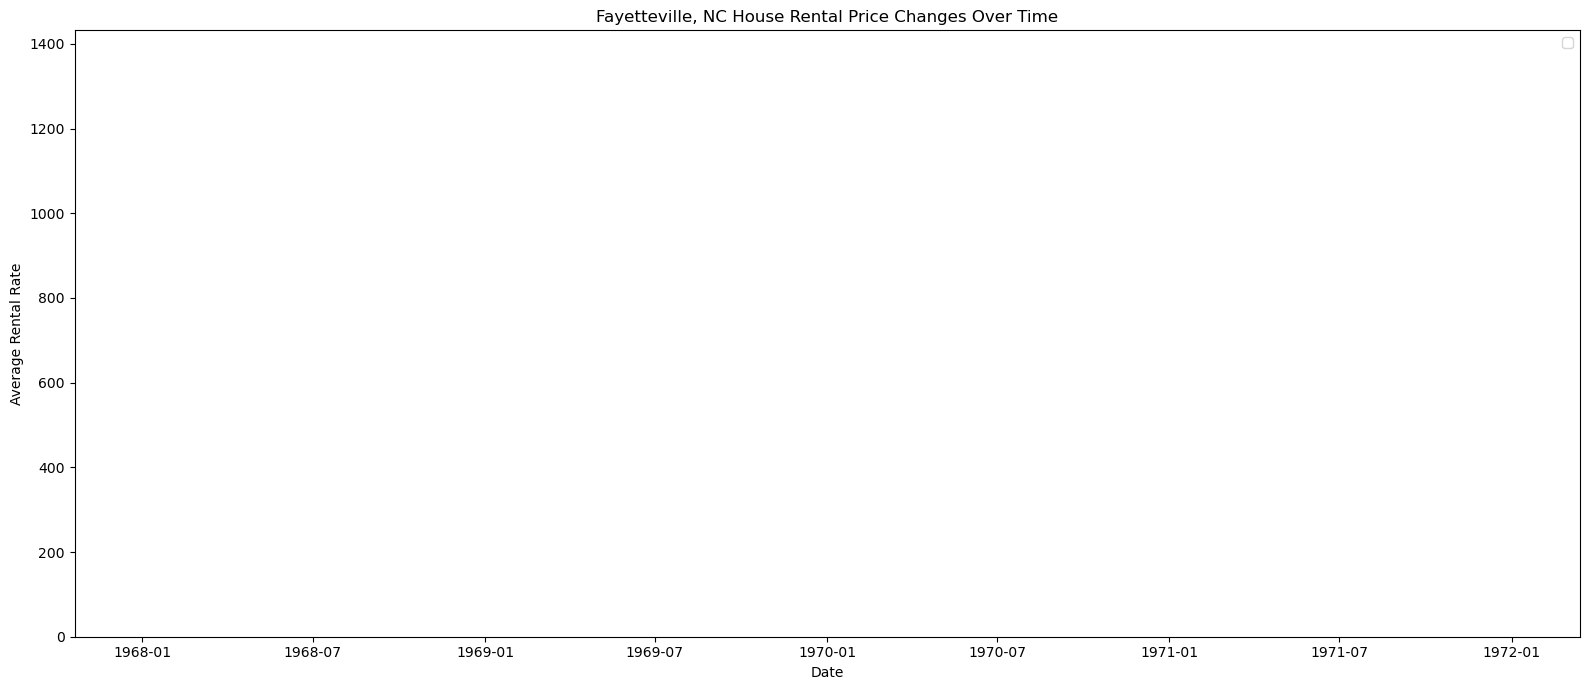

In [17]:
Fayetteville_Rent_Changes_yoy = Rent_Data[(Rent_Data["StateName"] == "NC") & (Rent_Data["RegionName"] == "Fayetteville")]

# Extract price time series
fayetteville_rent = Fayetteville_Rent_Changes_yoy.drop(columns=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName", "State", "Metro", "CountyName"])
fayetteville_rent.columns 
fayetteville_rent.index = pd.to_datetime(fayetteville_rent.index)


# Plot
fig, ax = plt.subplots(figsize=(16, 7))
ax.plot(fayetteville_rent)

ax.set_title("Fayetteville, NC House Rental Price Changes Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Average Rental Rate")
ax.legend()
plt.tight_layout()
ax.set_ylim(bottom=0)
plt.show()

In [18]:
National_Rent_Average = Rent_Data.loc[:, "2015-01-31":].mean()
National_Rent_Average

2015-01-31    1233.991671
2015-02-28    1243.527745
2015-03-31    1253.308145
2015-04-30    1264.538193
2015-05-31    1281.312647
                 ...     
2024-12-31    2140.406374
2025-01-31    2180.313217
2025-02-28    2191.718585
2025-03-31    2200.162824
2025-04-30    2227.426657
Length: 124, dtype: float64

Import and manipulate BAH rates

In [19]:
BAH = pd.read_excel("BAH Changes by year.xlsx")
BAH

,Rank @ Bragg,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,E1,1161,1170,1179,1107,1134,1170,1233,1401,1530,1635,1701
1,E2,1161,1170,1179,1107,1134,1170,1233,1401,1530,1635,1701
2,E3,1161,1170,1179,1107,1134,1170,1233,1401,1530,1635,1701
3,E4,1161,1170,1179,1107,1134,1170,1233,1401,1530,1635,1701
4,E5,1218,1236,1239,1191,1212,1233,1314,1251,1572,1716,1785
5,E6,1239,1410,1344,1368,1425,1428,1653,1701,1890,1995,2016
6,E7,1371,1437,1380,1407,1464,1446,1671,1725,1911,2016,2016
7,E8,1518,1470,1422,1452,1512,1473,1680,1758,1935,2025,2109
8,E9,1659,1545,1515,1524,1587,1551,1701,1812,2022,2121,2211


In [20]:
BAH_avg = BAH.iloc[:, 1:].mean()
BAH_avg


2015    1294.333333
2016    1308.666667
2017    1290.666667
2018    1263.333333
2019    1304.000000
2020    1312.333333
2021    1439.000000
2022    1539.000000
2023    1716.666667
2024    1823.666667
2025    1882.333333
dtype: float64

In [28]:
type(BAH_avg.index[0])

int

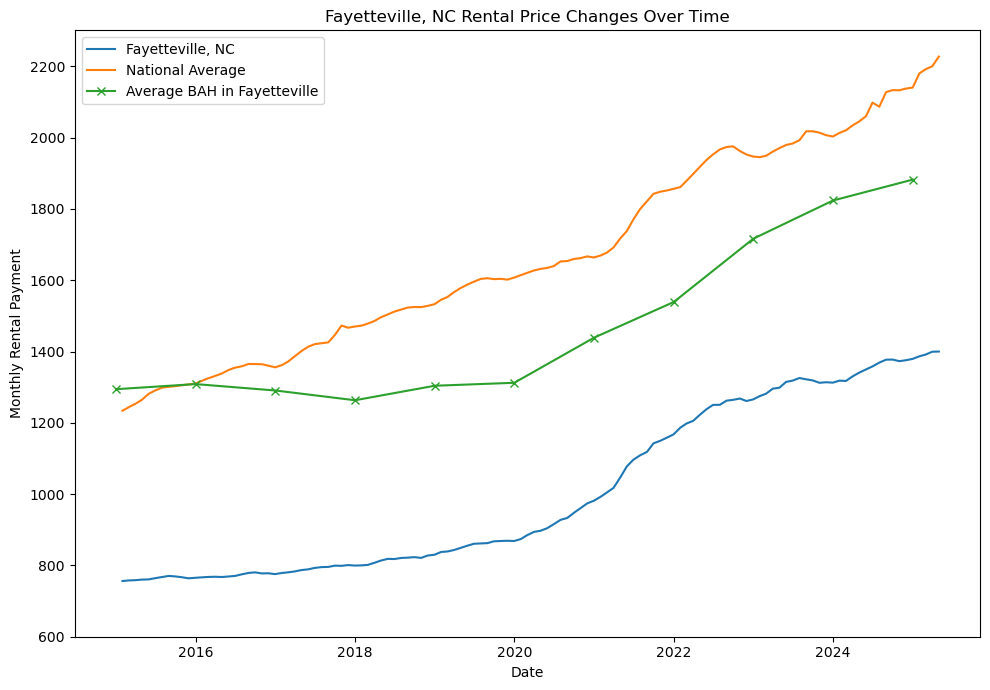

In [31]:
# Filter for Fayetteville from national 
Fayetteville_Rent_Changes_yoy = Rent_Data[(Rent_Data["StateName"] == "NC") & (Rent_Data["RegionName"] == "Fayetteville")]

# Drop unnecessary / strings
fayetteville_rent = Fayetteville_Rent_Changes_yoy.drop(columns=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName", "State", "Metro", "CountyName"], errors='ignore')
fayetteville_rent = fayetteville_rent.T

# Convert the index to datetime
fayetteville_rent.index = pd.to_datetime(fayetteville_rent.index)
National_Rent_Average.index = pd.to_datetime(National_Rent_Average.index)
BAH_avg.index = pd.to_datetime(BAH_avg.index, format="%Y")

#Plotting
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(fayetteville_rent.index, fayetteville_rent, label="Fayetteville, NC")
ax.plot(National_Rent_Average.index, National_Rent_Average, label= "National Average")
ax.plot(BAH_avg.index, BAH_avg, label="Average BAH in Fayetteville", marker= "x")

#Visuals
ax.set_title("Fayetteville, NC Rental Price Changes Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Monthly Rental Payment")
ax.legend()
plt.tight_layout()
ax.set_ylim(bottom=600)
plt.show()


Calculate the average Rent cost for last year 04/2024 --> 04/2025

In [23]:
Fayetteville_Rent_Changes_yoy

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2015-01-31,2015-02-28,...,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30
113,52001,114,Fayetteville,city,NC,NC,"Fayetteville, NC",Cumberland County,756.207582,757.869745,...,1368.907531,1377.156366,1377.459525,1372.970558,1375.573229,1379.376116,1386.733827,1391.436017,1399.461633,1399.987518


In [24]:
# Fayetteville_Rent_Changes_yoy
Last_rental_year= Fayetteville_Rent_Changes_yoy.loc[:, "2024-04-30":"2025-04-30"].mean().mean()
Last_rental_year
# Fayetteville_Rent_Changes_yoy.mean()

1375.2317768457538

Establishing Mortgage Payments by month over last 15 years


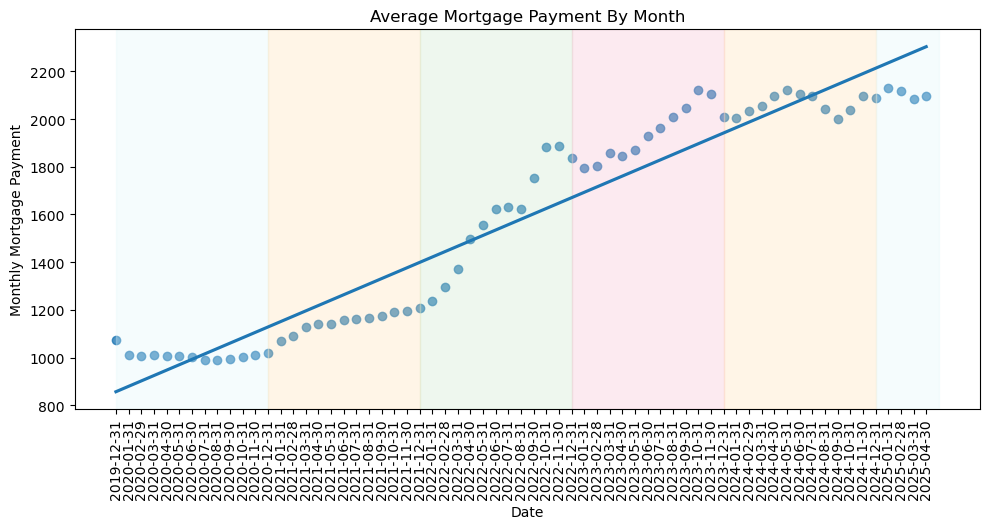

In [25]:
x = Fay_mortgage_clean.columns.date
y = Fay_mortgage_clean

plt.figure(figsize=(10, 5))
ax = sns.regplot(x=np.arange(len(x)), y=y, scatter=True, ci=None)

# Shade different years
year_starts = [0, 12, 24, 36, 48,60] 
year_ends = [12, 24, 36, 48, 60, len(x)]

# Colors for shading
colors = ["#e0f7fa", "#ffe0b2", "#c8e6c9", "#f8bbd0", "#ffe0b2", "#e0f7fa"]

for start, end, color in zip(year_starts, year_ends, colors):
    ax.axvspan(start, end, color=color, alpha=0.3)

plt.xticks(ticks=np.arange(len(x)), labels=x, rotation=90)
plt.tight_layout()
plt.title("Average Mortgage Payment By Month")
plt.xlabel("Date")
plt.ylabel("Monthly Mortgage Payment")
plt.show()


Key takeaway


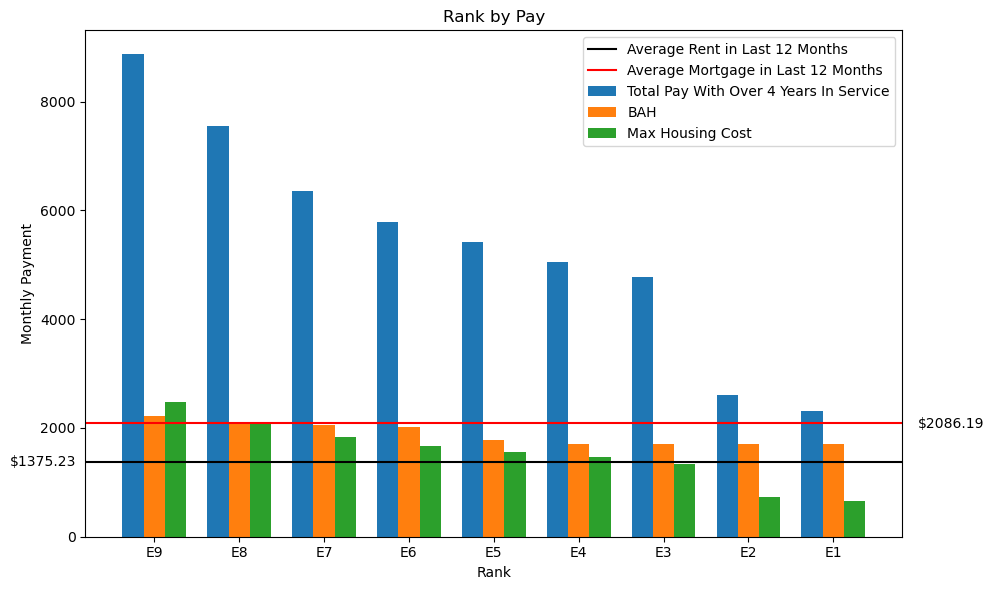

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(pay_table["Pay Grade"]))  # label locations
bar_width = 0.25

bars1 = ax.bar(x - bar_width, pay_table["Total Pay With Over 4 Years In Service"].astype(int), bar_width, label="Total Pay With Over 4 Years In Service")
bars2 = ax.bar(x, pay_table["BAH"].astype(int), bar_width, label="BAH")
bars3 = ax.bar(x + bar_width, pay_table["Max Housing Cost"].astype(int), bar_width, label="Max Housing Cost")
rent = ax.axhline(Last_rental_year, color="black", label="Average Rent in Last 12 Months")
Mortgage = ax.axhline(AVG_Mortgage_12mo_trail, color="red", label="Average Mortgage in Last 12 Months")
ax.text(-1.7,1300, "$1375.23")
ax.text(9,2000, "$2086.19" )

ax.set_ylabel("Monthly Payment")
ax.set_xlabel("Rank")
ax.set_title("Rank by Pay")

ax.set_xticks(x)
ax.set_xticklabels(pay_table["Pay Grade"])

ax.legend()

plt.tight_layout()
plt.show()

INFLATION DATA 

In [47]:
inflation = pd.read_excel("Inflation.xlsx")

In [48]:
inflation

,Year,Inflation YOY Change,Federal Funds Rate,Business Cycle*,Events Affecting Inflation
0,1929,0.006,NaN,August peak,Market crash
1,1930,-0.064,NaN,Contraction (-8.5%),Smoot-Hawley Tariff Act
2,1931,-0.093,NaN,Contraction (-6.4%),Dust Bowl began
3,1932,-0.103,NaN,Contraction (-12.9%),Hoover tax hikes
4,1933,0.008,NaN,Contraction ended in March (-1.2%),FDR’s New Deal
...,...,...,...,...,...
91,2020,0.014,0.0025,Contraction (-2.2%),COVID-19 pandemic
92,2021,0.070,0.0025,Expansion (5.8%),COVID-19 pandemic
93,2022,0.065,0.0450,Expansion (1.9%),Russia invades Ukraine
94,2023,0.034,0.0550,Expansion (2.5%),Fed raised rates


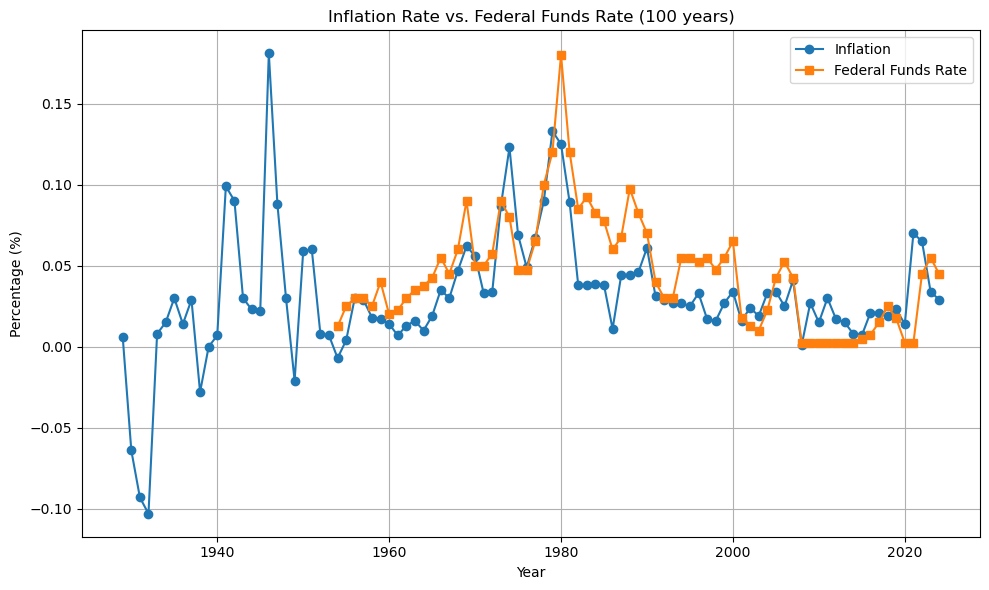

In [64]:
import seaborn as sns
inflation = pd.DataFrame(inflation)

# # Convert Year to datetime for better plotting (optional)
inflation["Year"] = pd.to_datetime(inflation["Year"], format="%Y")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(inflation["Year"], inflation["Inflation YOY Change"], label="Inflation", marker="o")
plt.plot(inflation["Year"], inflation["Federal Funds Rate"], label="Federal Funds Rate", marker="s")
# sns.lineplot(x="Year", y="Inflation Rate", data=inflation, label="Inflation Rate (%) Change from last December", marker="o")
# sns.lineplot(x="Year", y="Federal Funds Rate", data=inflation, label="Federal Funds Rate (%)", marker="s")

plt.title("Inflation Rate vs. Federal Funds Rate (100 years)")
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
